In [60]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

In [61]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

In [62]:
# read in comma-delimited text file, creating a pandas DataFrame object
valid_survey_input = pd.read_csv('mspa-survey-data.csv')
print(pd.DataFrame.head(valid_survey_input))

   RespondentID  Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
0    5135740122                        0                           0   
1    5133300037                       10                          10   
2    5132253300                       20                           0   
3    5132096630                       10                          10   
4    5131990362                       20                           0   

   Personal_Python  Personal_R  Personal_SAS  Professional_JavaScalaSpark  \
0                0          50            50                            0   
1               50          30             0                           25   
2               40          40             0                            0   
3               25          35            20                           10   
4                0          70            10                           20   

   Professional_JavaScriptHTMLCSS  Professional_Python  Professional_R  \
0                             

In [63]:
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)
print(pd.DataFrame.head(valid_survey_input))

              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0                           0   
5133300037                         10                          10   
5132253300                         20                           0   
5132096630                         10                          10   
5131990362                         20                           0   

              Personal_Python  Personal_R  Personal_SAS  \
RespondentID                                              
5135740122                  0          50            50   
5133300037                 50          30             0   
5132253300                 40          40             0   
5132096630                 25          35            20   
5131990362                  0          70            10   

              Professional_JavaScalaSpark  Professional_JavaScriptHTMLCSS  \
RespondentID             

In [64]:
# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')


Contents of initial survey data ---------------


In [65]:
# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 


Number of Respondents = 207


In [66]:
# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [67]:
# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 

              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0                           0   
5133300037                         10                          10   
5132253300                         20                           0   
5132096630                         10                          10   
5131990362                         20                           0   

              Personal_Python  Personal_R  Personal_SAS  \
RespondentID                                              
5135740122                  0          50            50   
5133300037                 50          30             0   
5132253300                 40          40             0   
5132096630                 25          35            20   
5131990362                  0          70            10   

              Professional_JavaScalaSpark  Professional_JavaScriptHTMLCSS  \
RespondentID             

In [68]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
print(valid_survey_input.columns)
#the column names stay the same when using print() of dataset
#but when refer the column in command (see line of code below), can use the short abbreviation of the columns

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [69]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

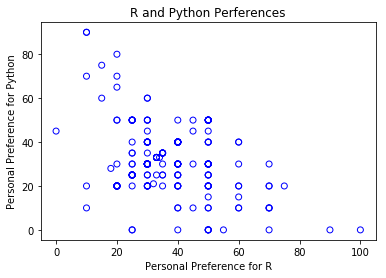

In [70]:
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

In [71]:

survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


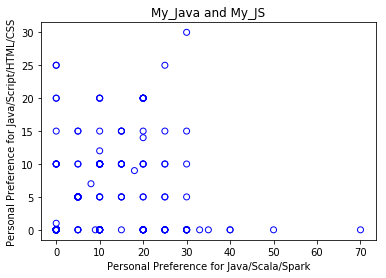

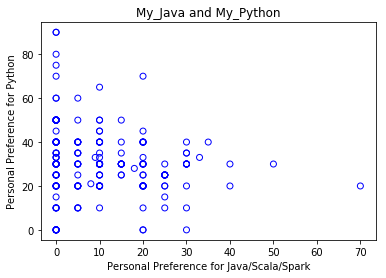

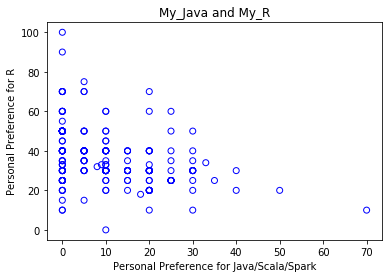

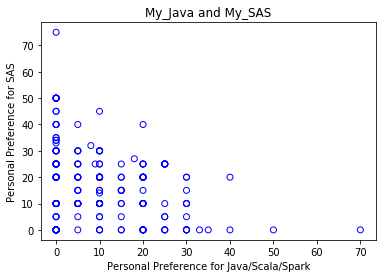

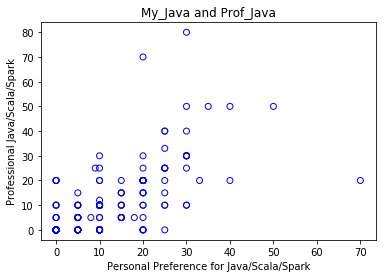

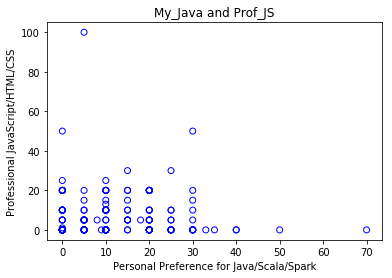

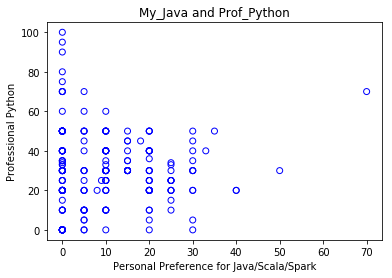

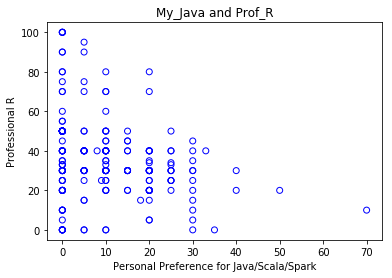

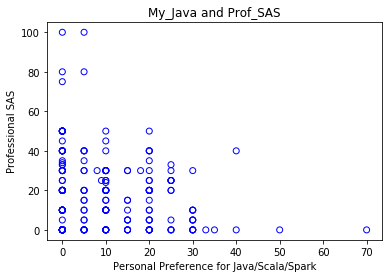

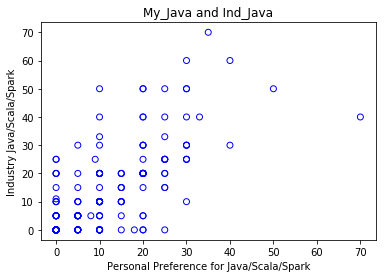

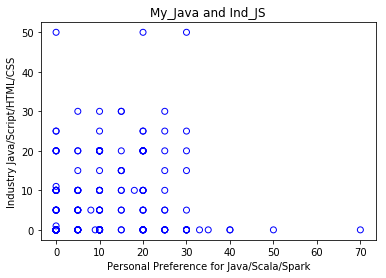

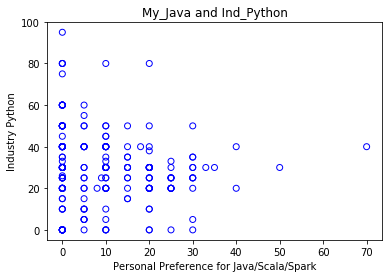

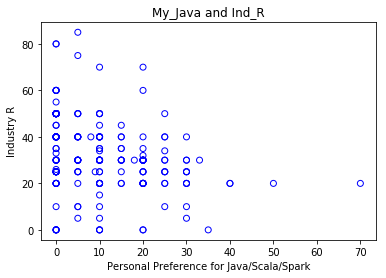

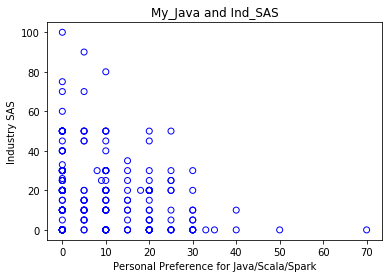

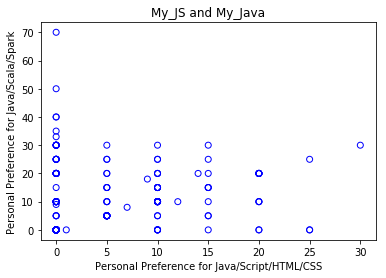

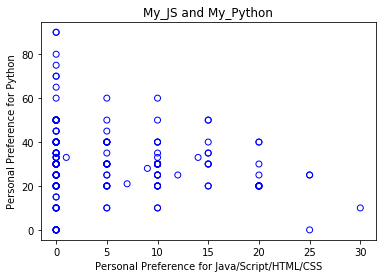

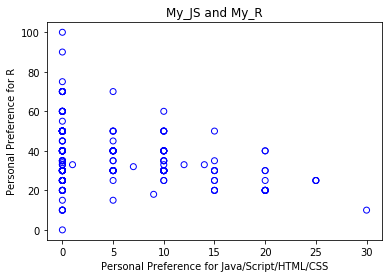

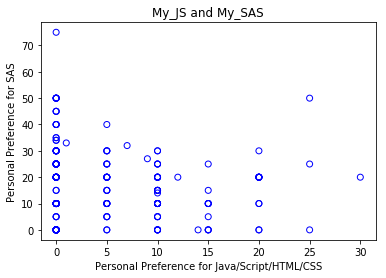

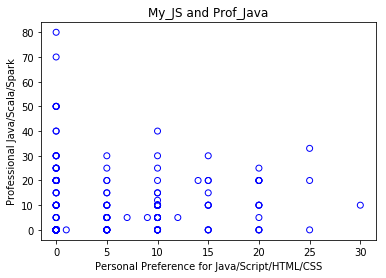

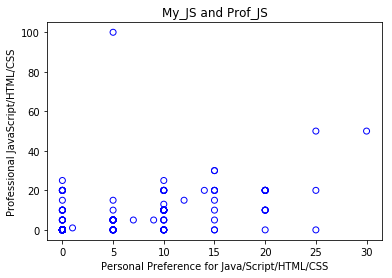

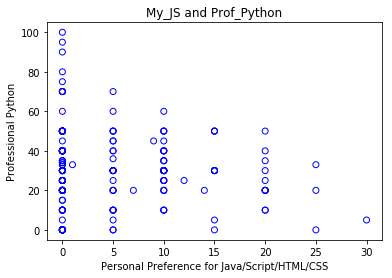

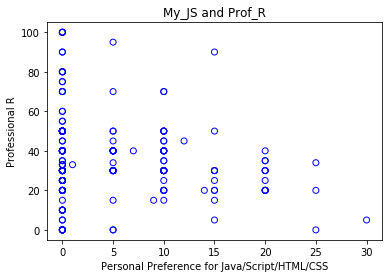

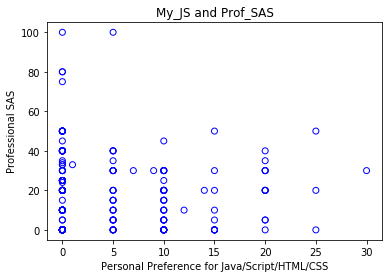

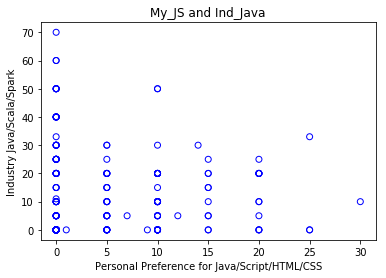

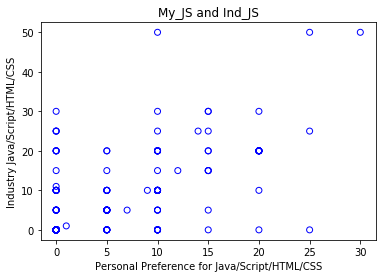

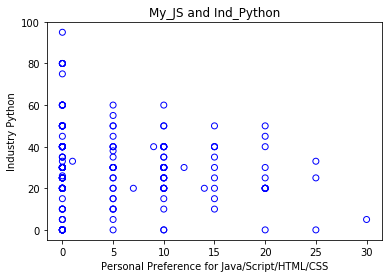

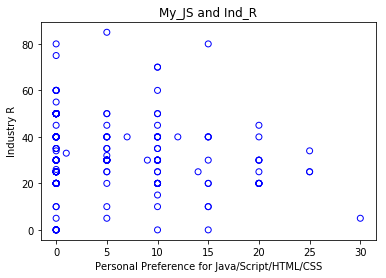

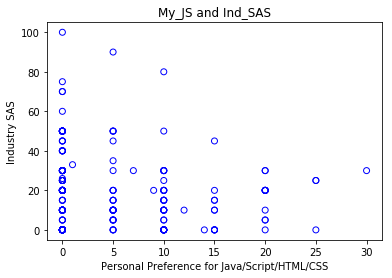

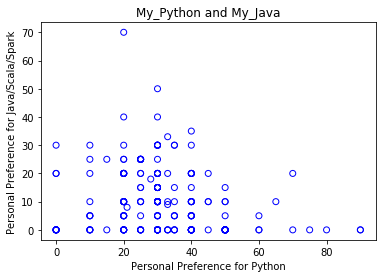

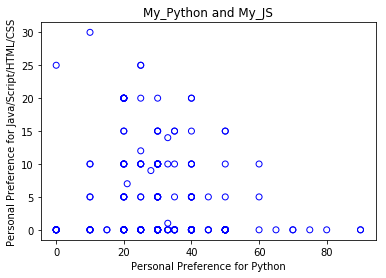

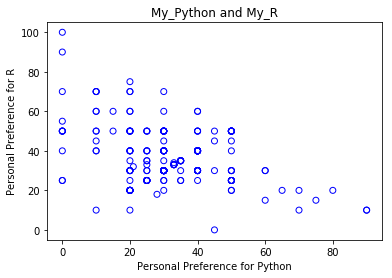

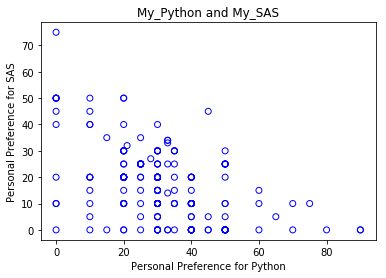

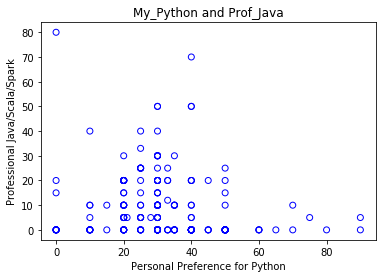

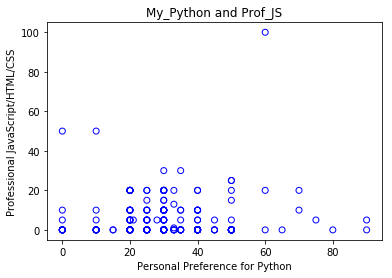

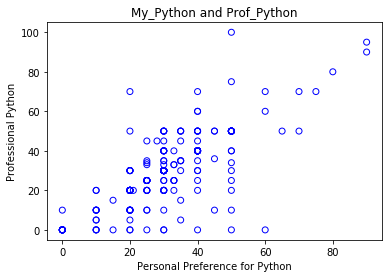

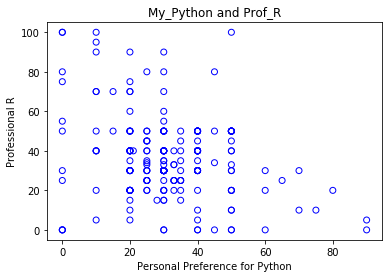

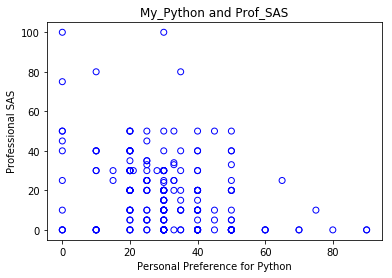

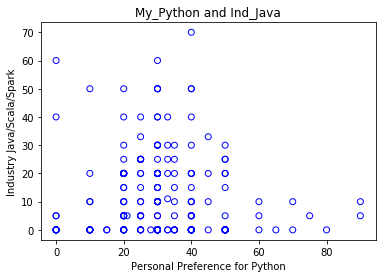

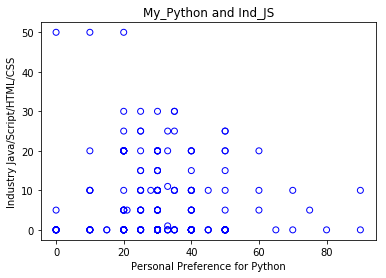

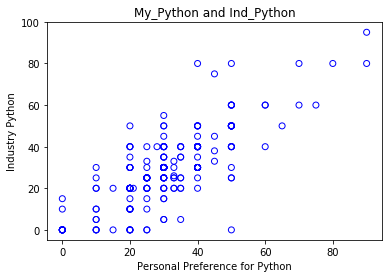

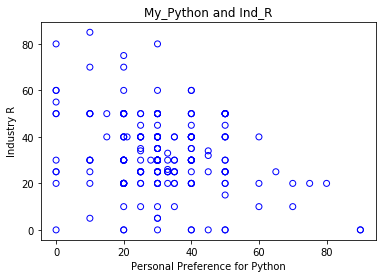

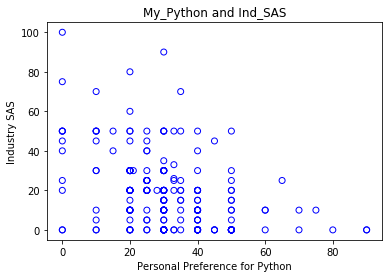

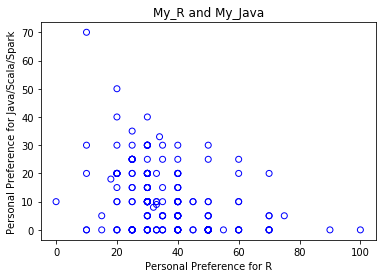

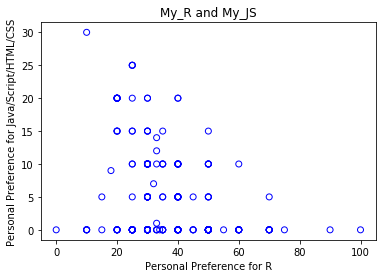

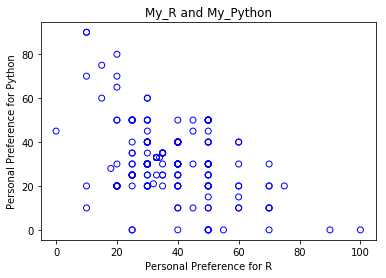

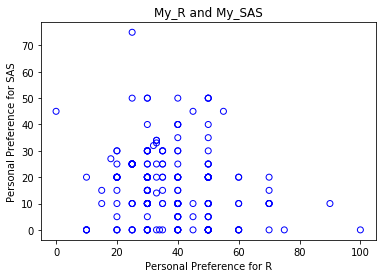

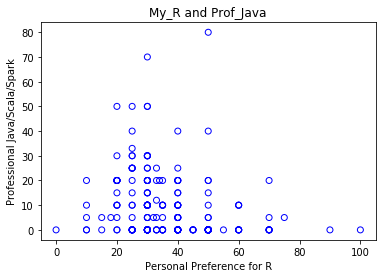

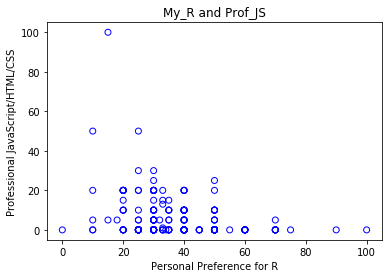

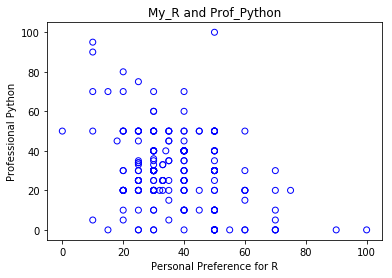

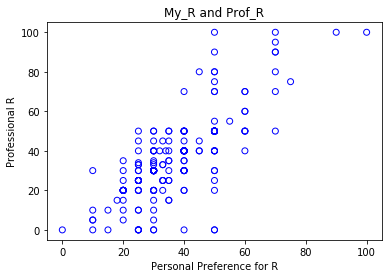

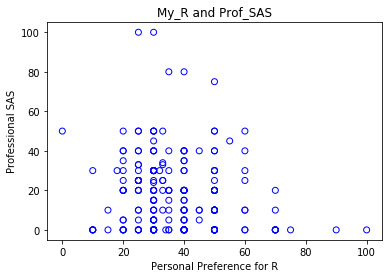

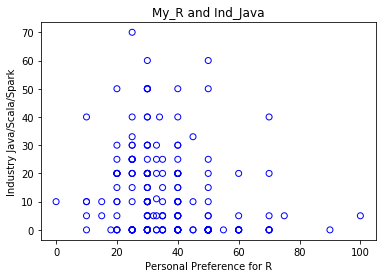

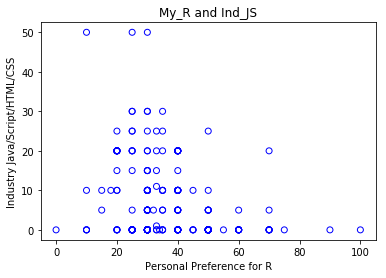

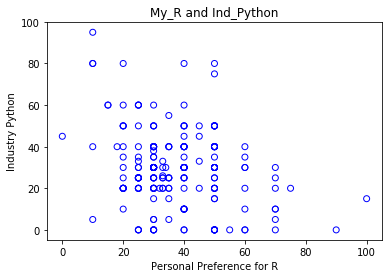

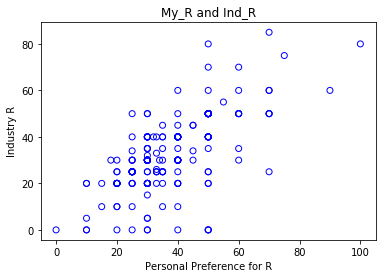

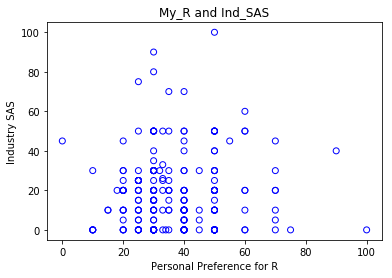

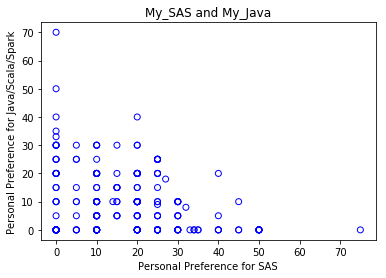

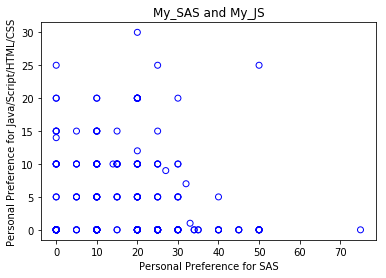

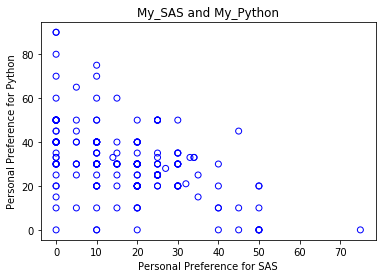

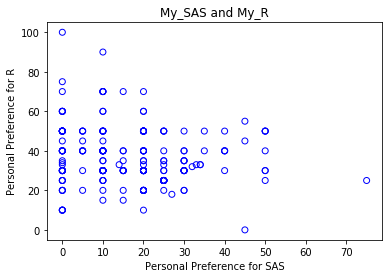

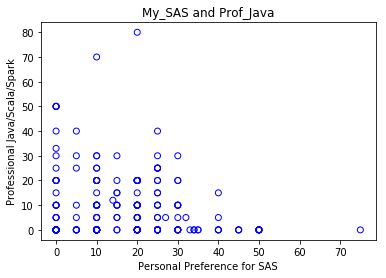

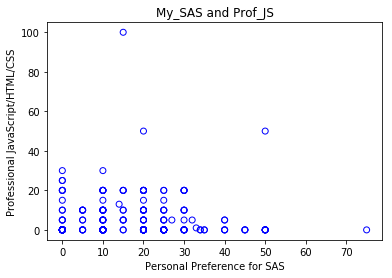

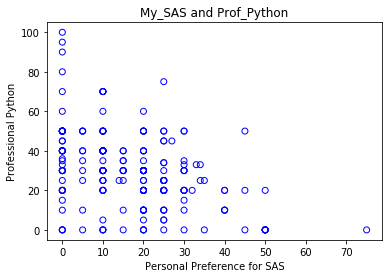

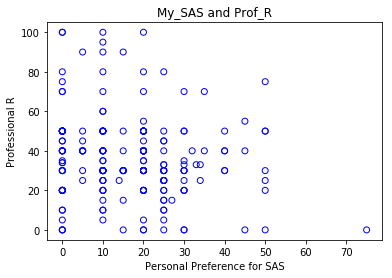

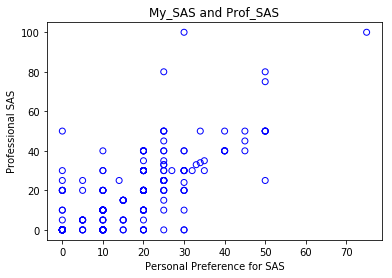

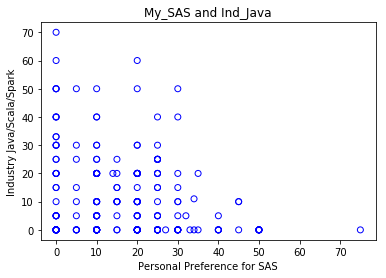

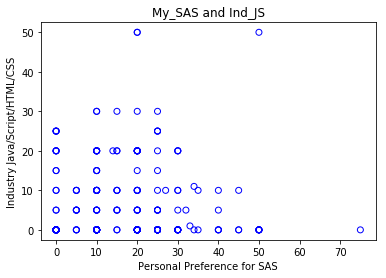

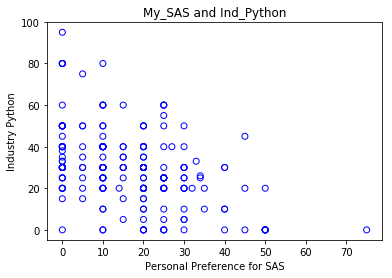

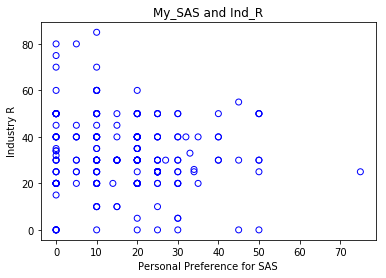

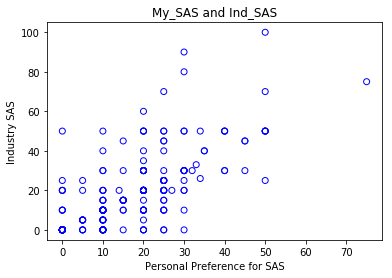

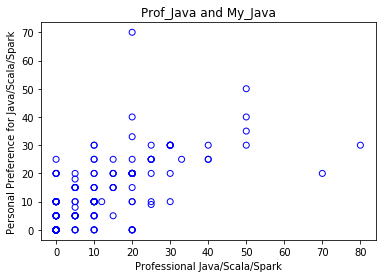

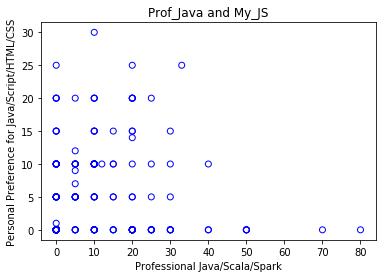

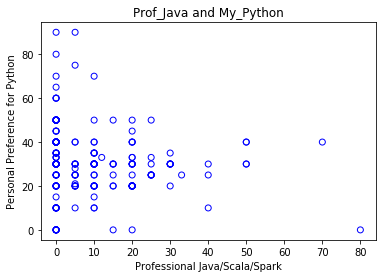

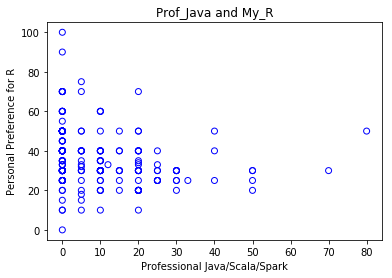

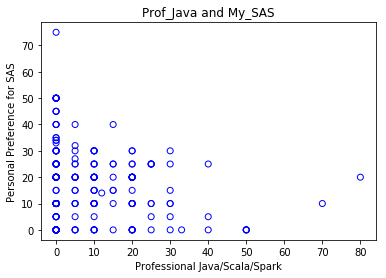

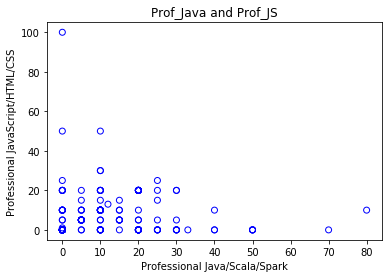

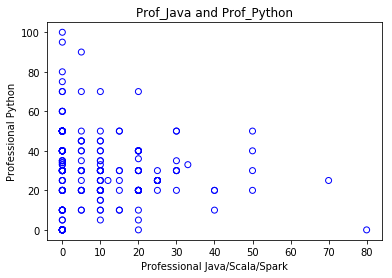

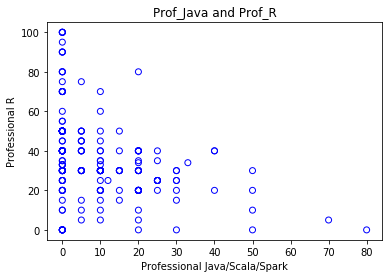

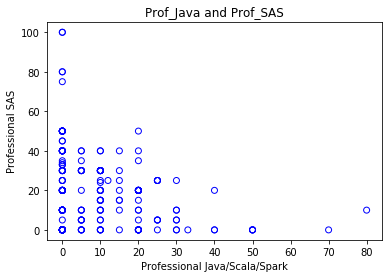

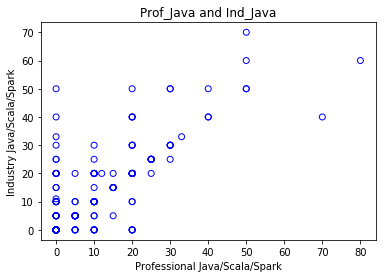

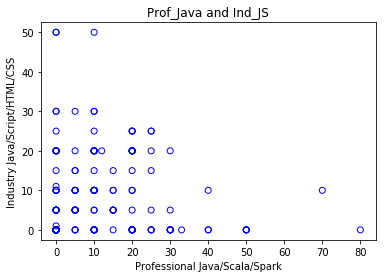

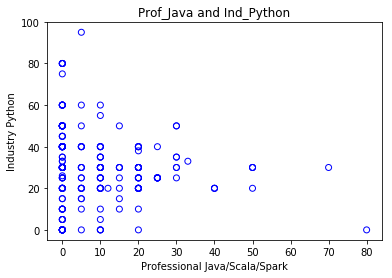

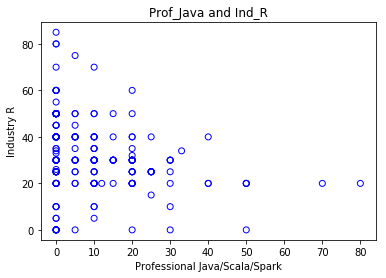

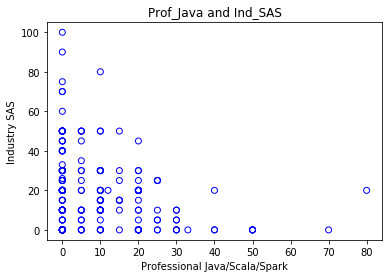

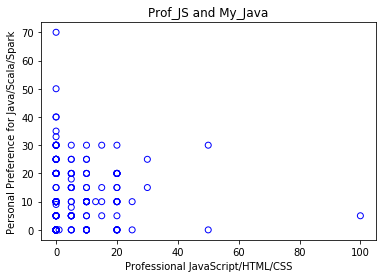

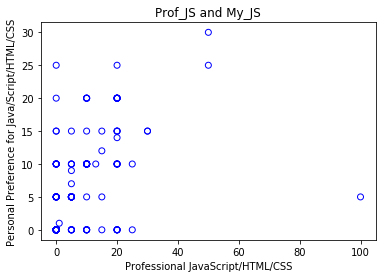

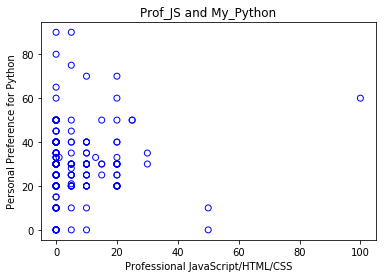

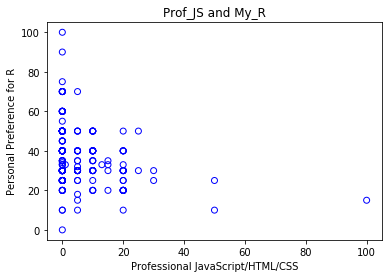

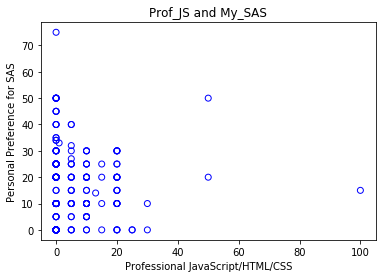

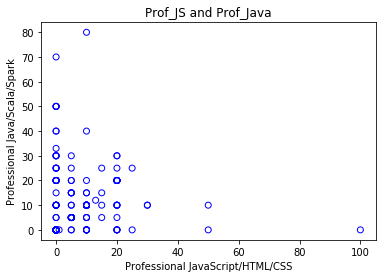

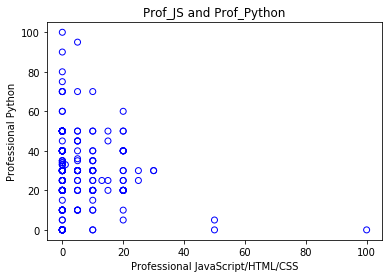

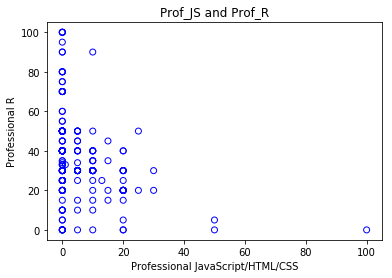

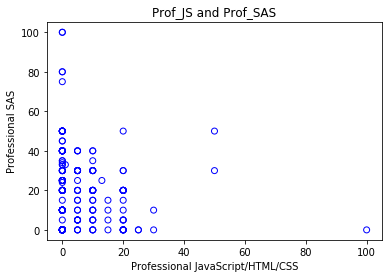

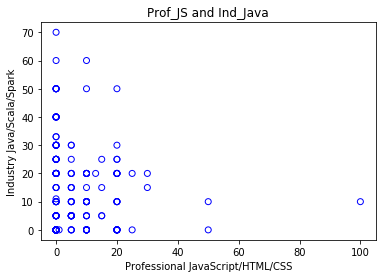

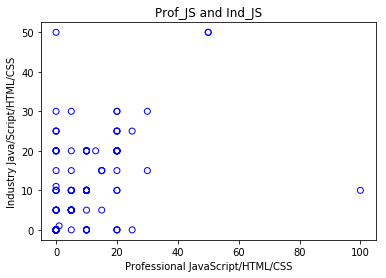

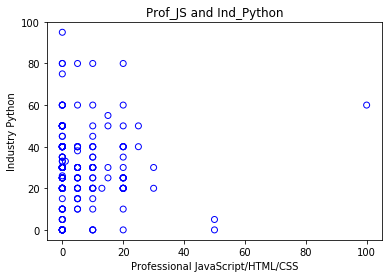

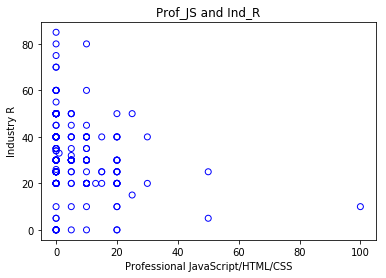

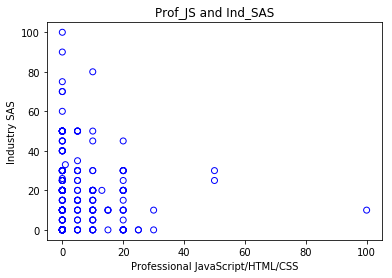

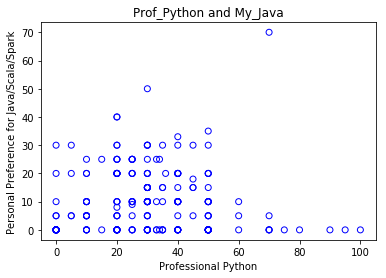

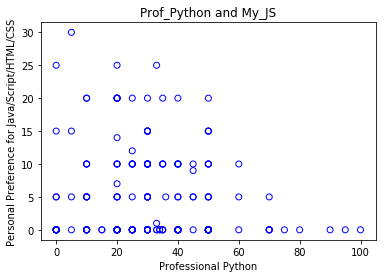

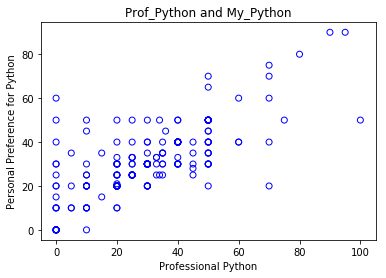

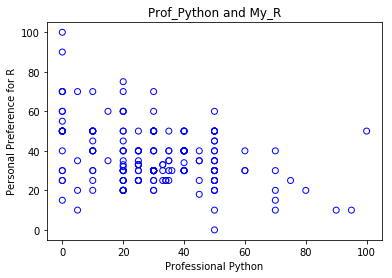

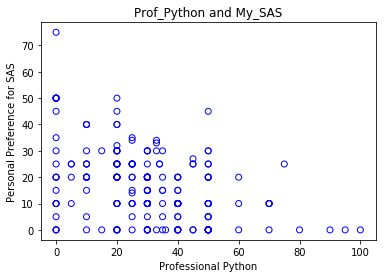

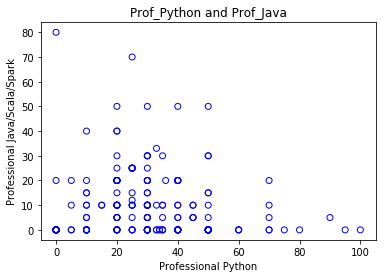

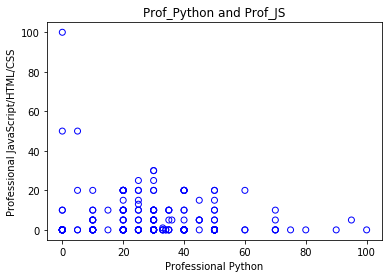

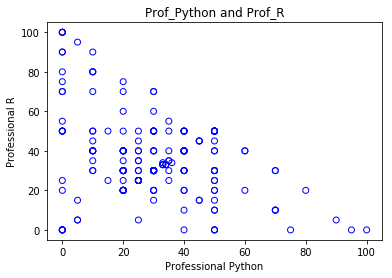

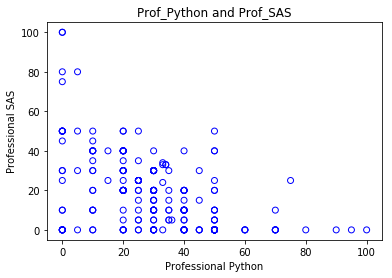

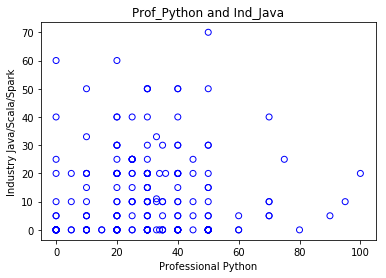

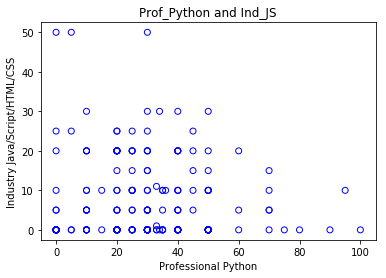

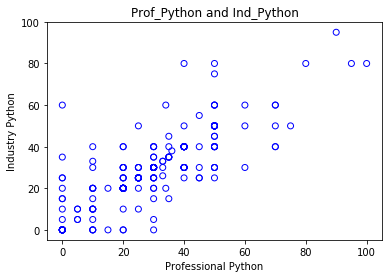

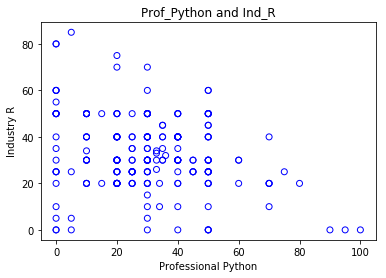

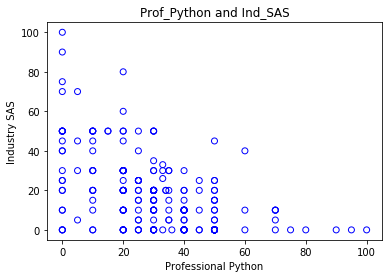

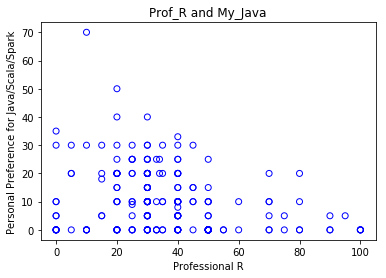

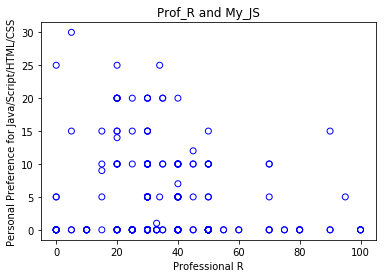

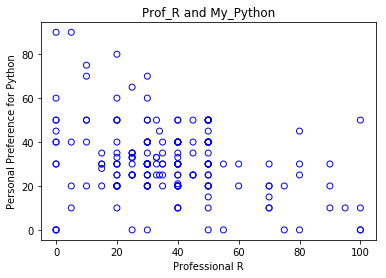

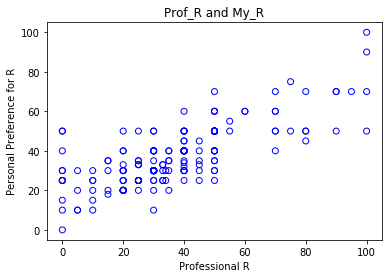

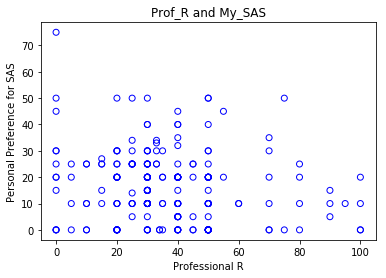

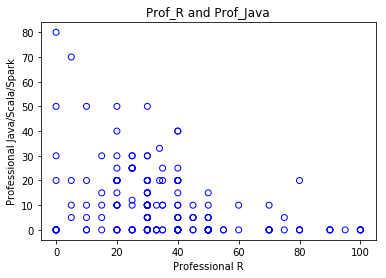

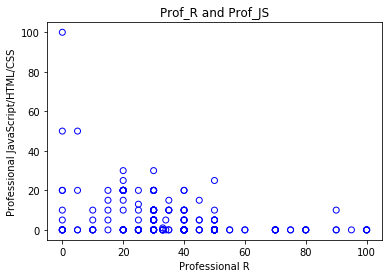

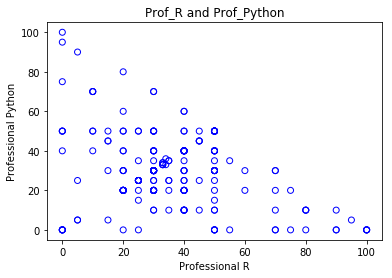

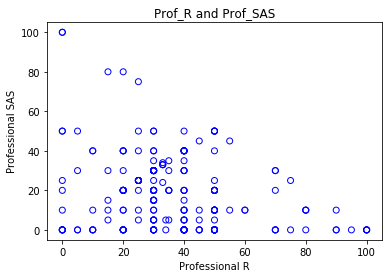

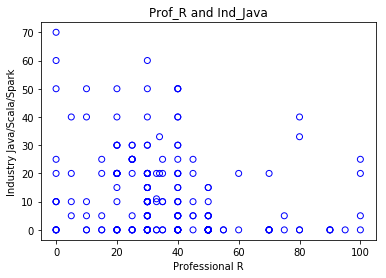

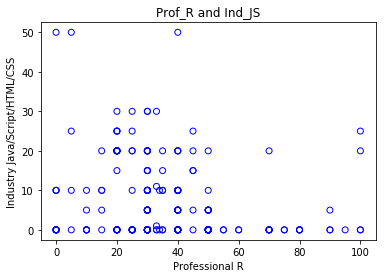

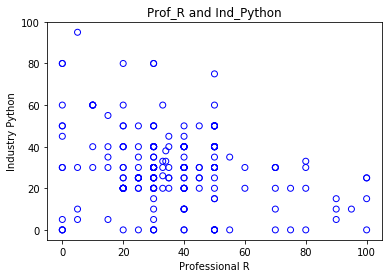

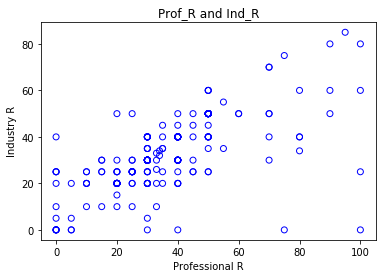

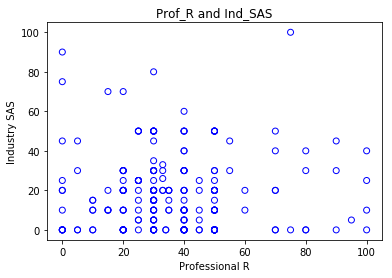

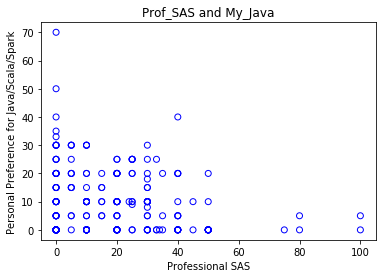

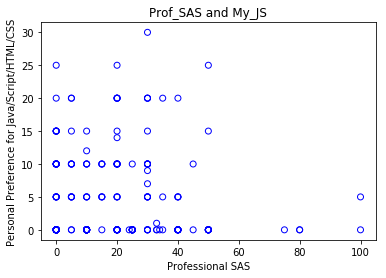

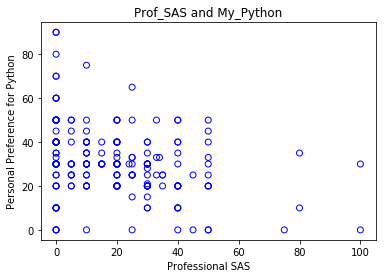

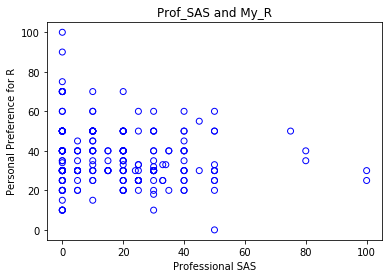

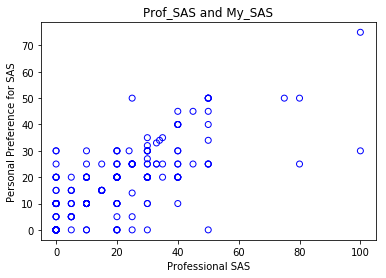

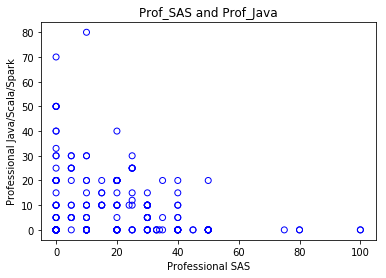

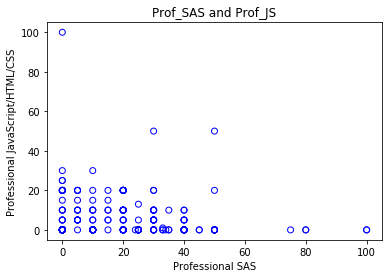

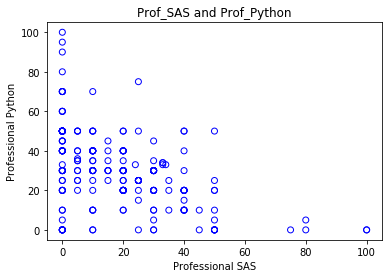

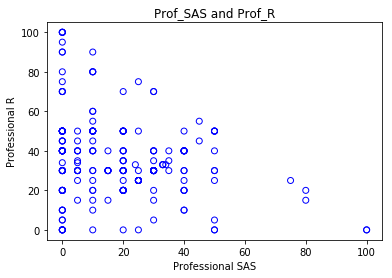

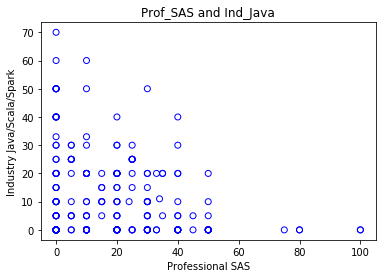

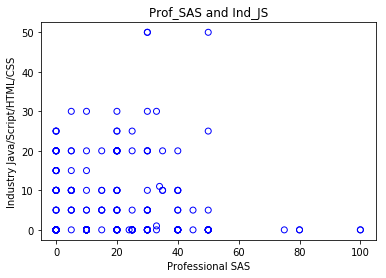

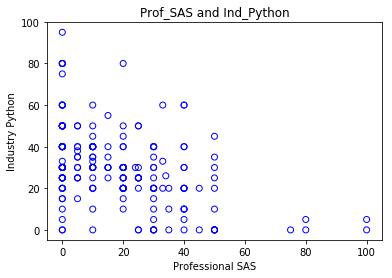

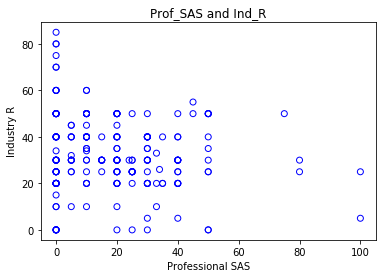

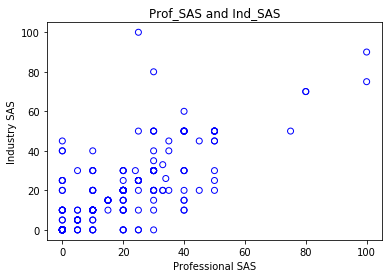

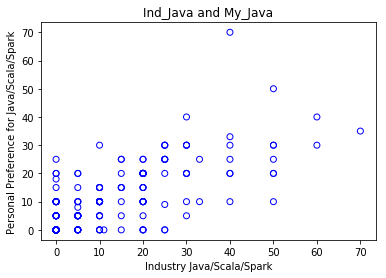

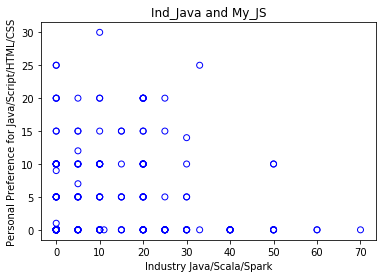

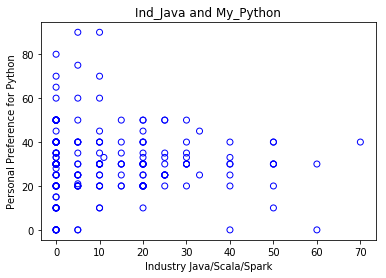

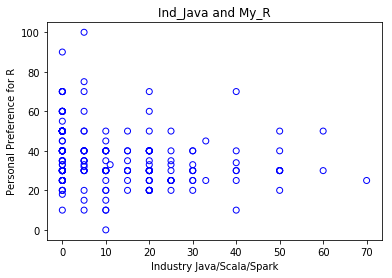

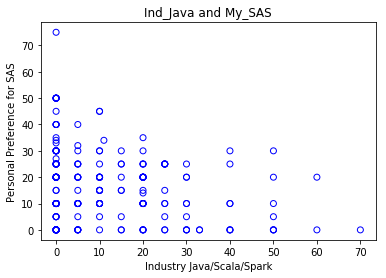

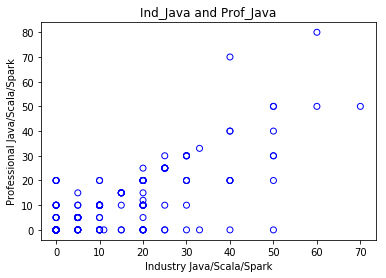

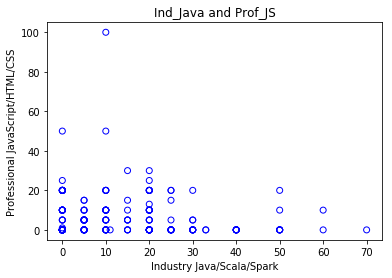

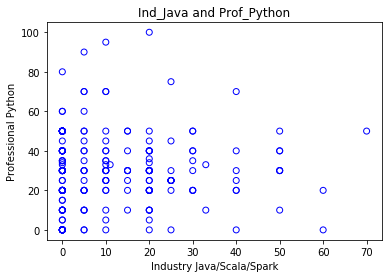

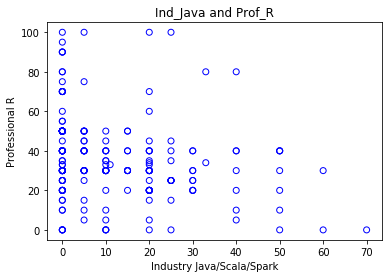

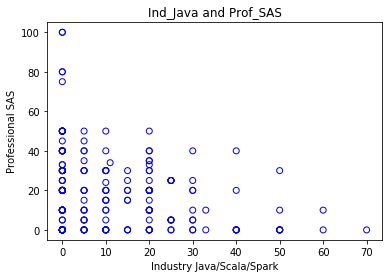

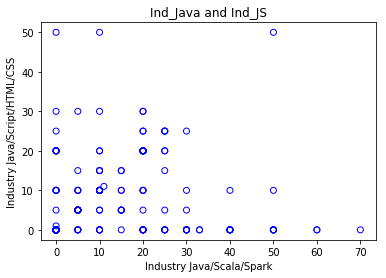

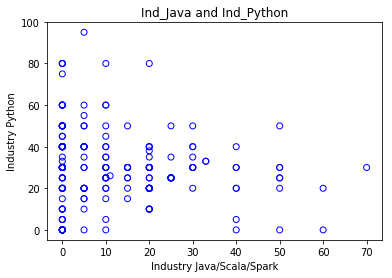

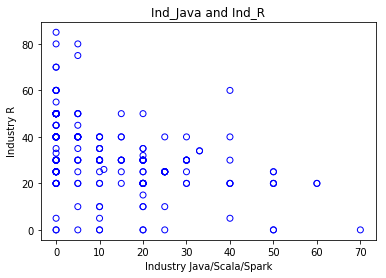

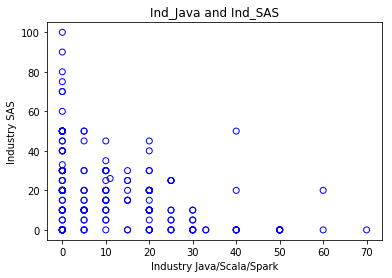

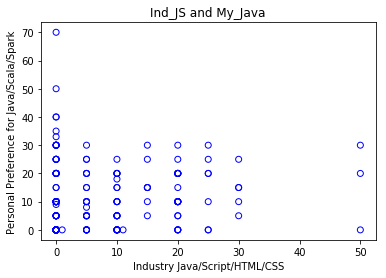

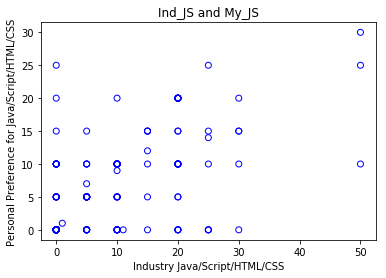

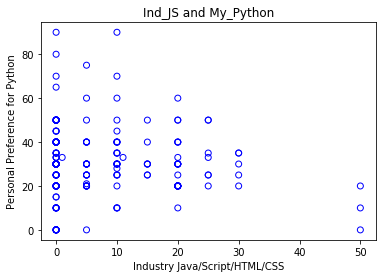

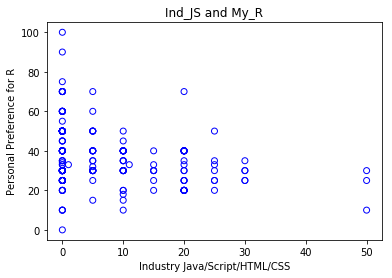

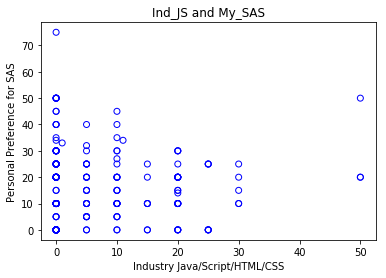

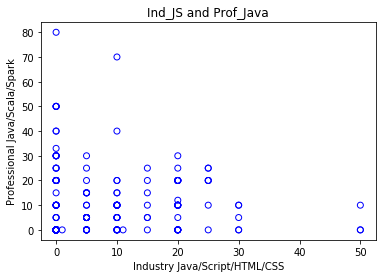

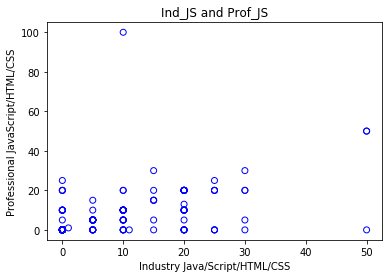

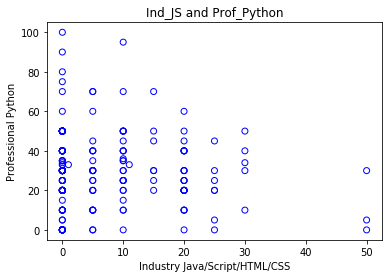

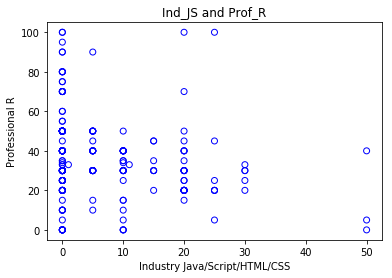

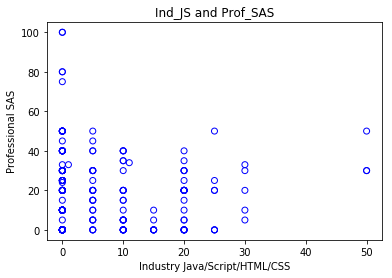

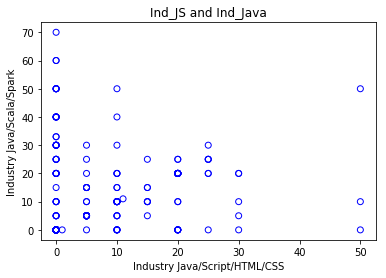

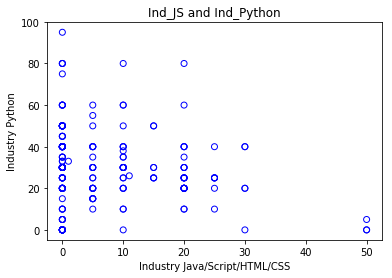

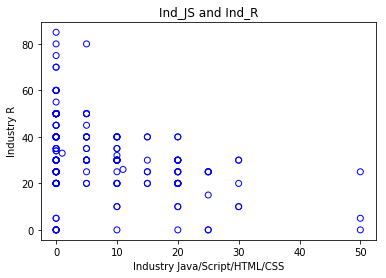

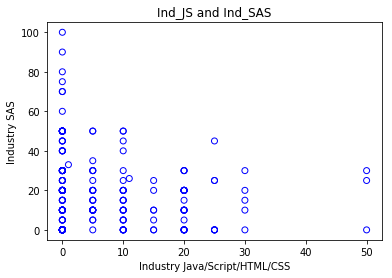

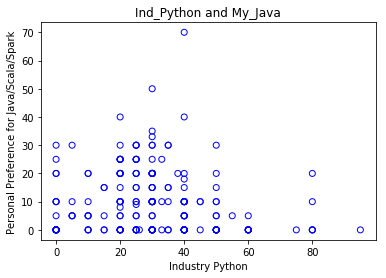

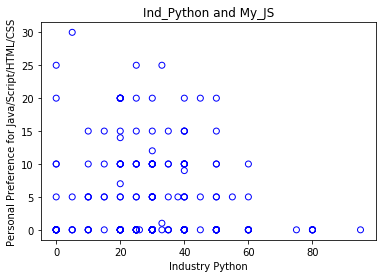

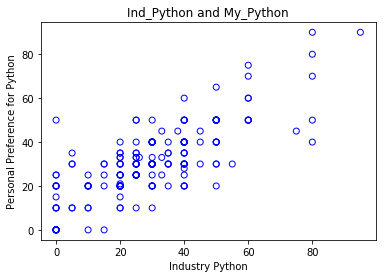

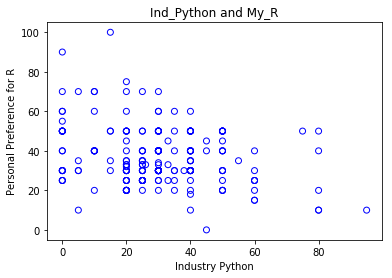

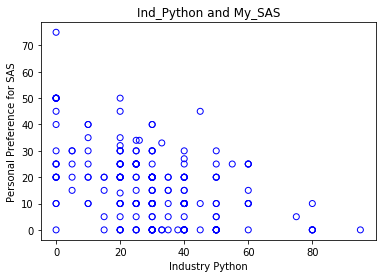

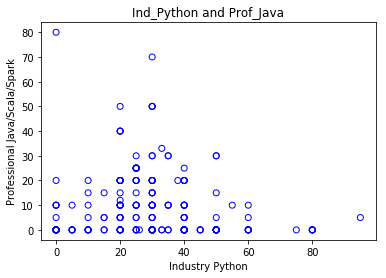

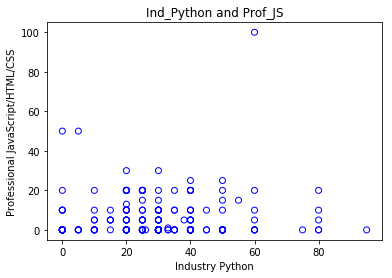

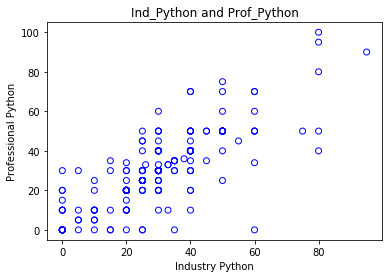

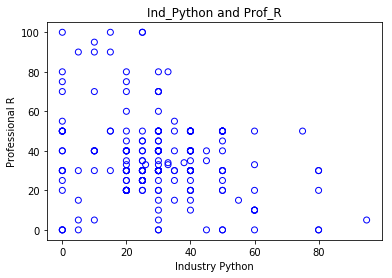

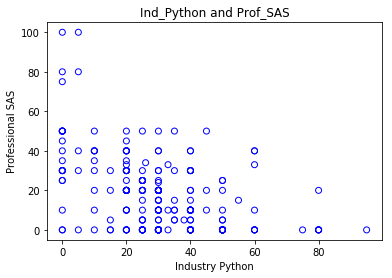

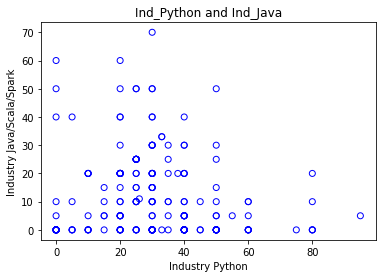

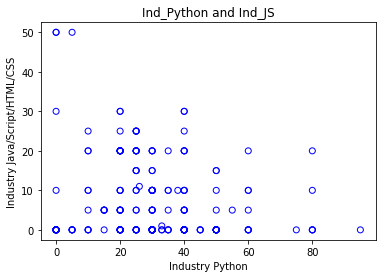

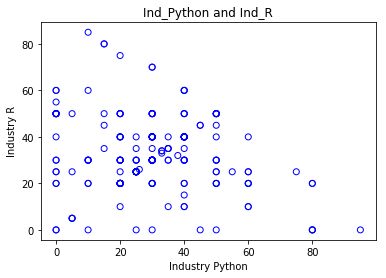

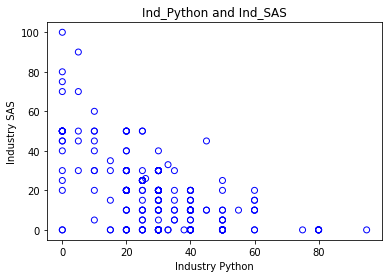

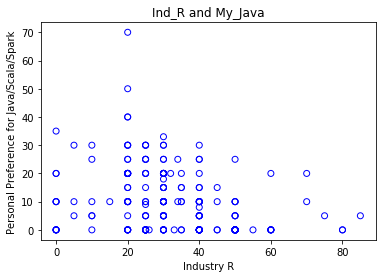

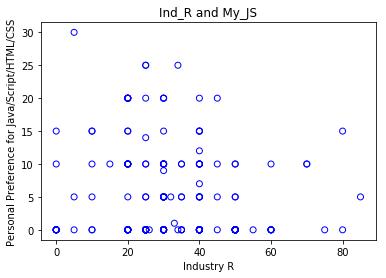

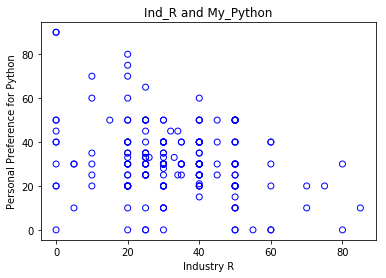

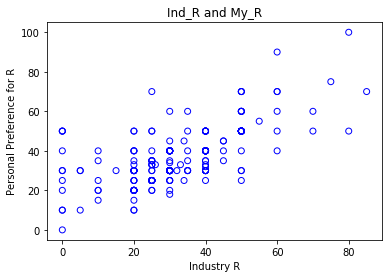

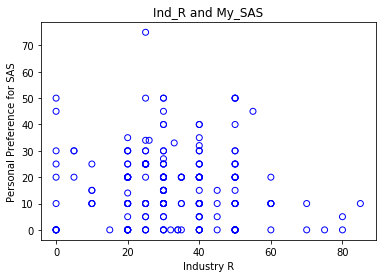

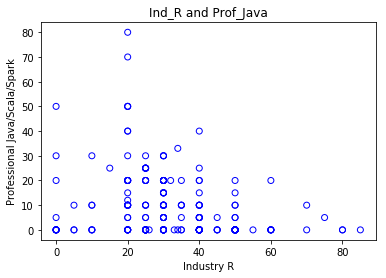

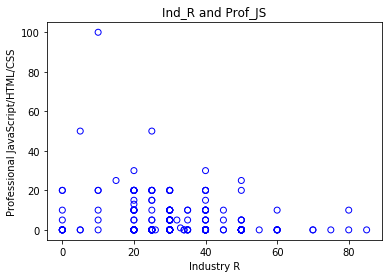

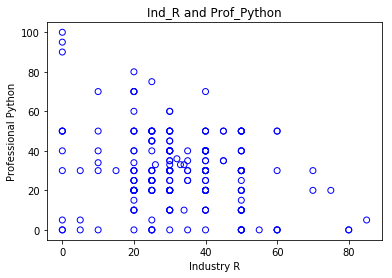

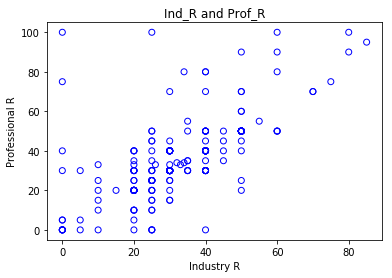

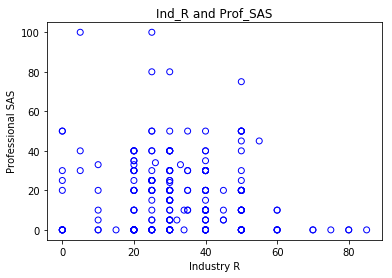

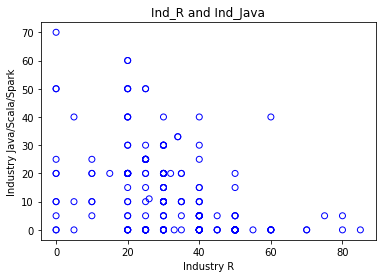

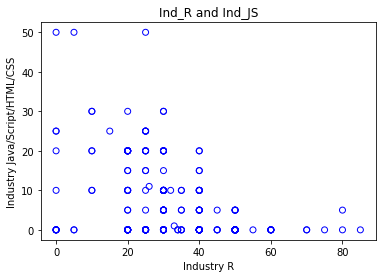

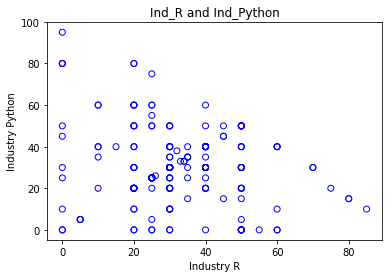

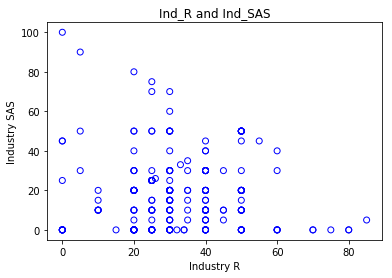

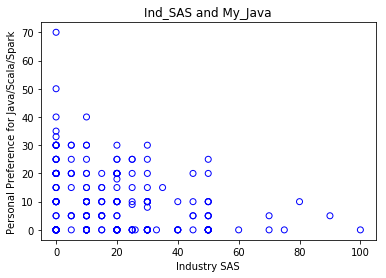

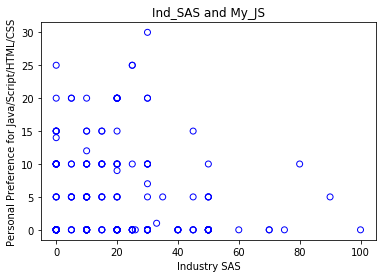

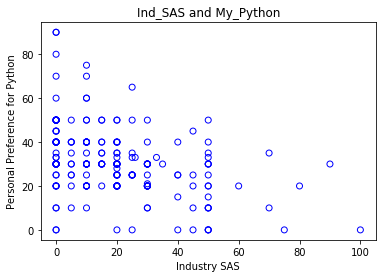

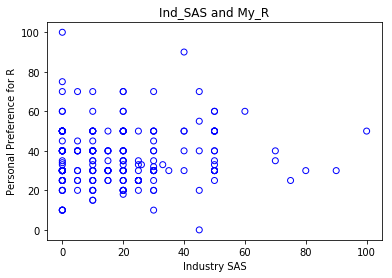

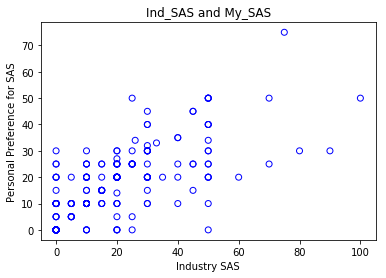

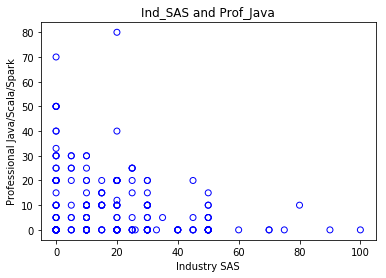

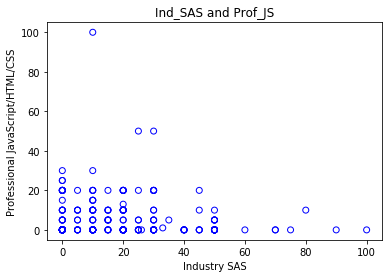

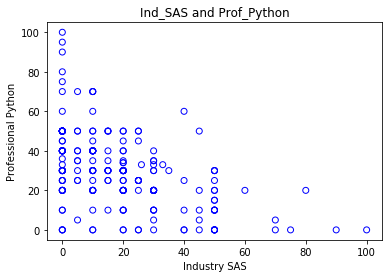

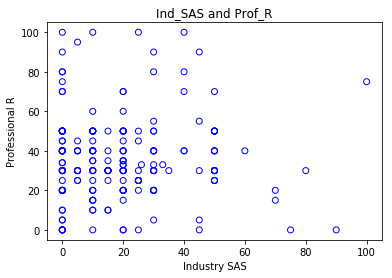

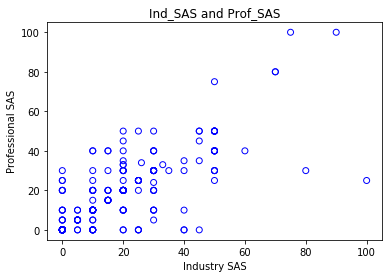

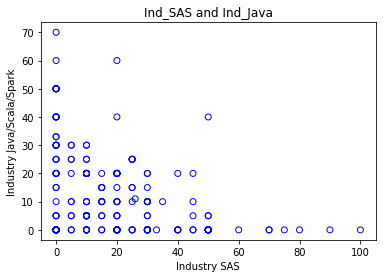

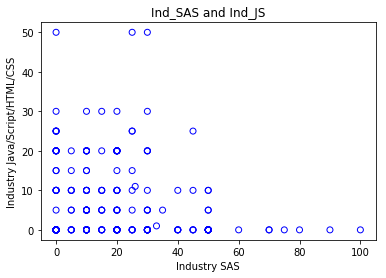

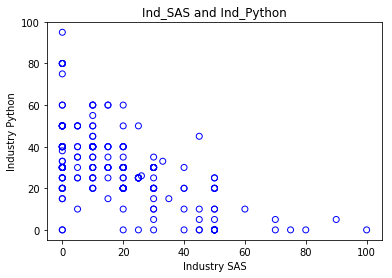

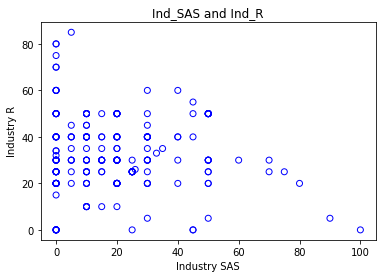

In [72]:
# create a set of scatter plots for personal, professional, and industry preferences
#modify starter code to change range(5) to range(15)
for i in range(15):
    for j in range(15):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  

<Figure size 432x288 with 0 Axes>

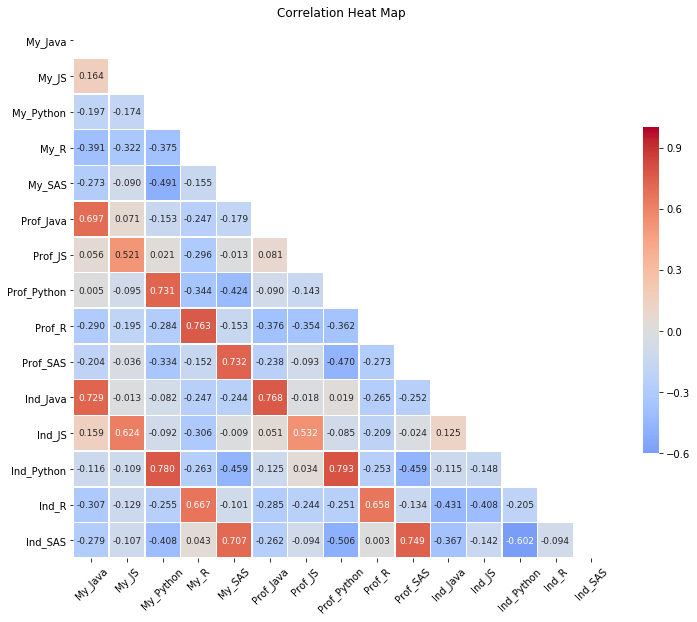

In [73]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

In [74]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())


Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

In [75]:
# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())


Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64


In [76]:
print(software_df.mean().sort_values())

My_JS           4.797101
Prof_JS         5.840580
Ind_JS          6.966184
Prof_Java       9.251208
My_Java        10.135266
Ind_Java       11.942029
My_SAS         16.637681
Prof_SAS       18.463768
Ind_SAS        18.884058
Ind_Python     29.772947
Prof_Python    30.028986
My_Python      31.304348
Ind_R          32.434783
Prof_R         36.415459
My_R           37.125604
dtype: float64


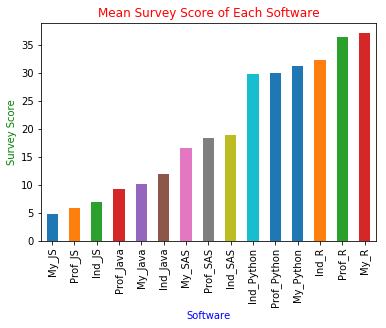

In [77]:
software_df.mean().sort_values().plot(kind='bar')
plt.title('Mean Survey Score of Each Software',color='red')
plt.xlabel('Software',color='blue')
plt.ylabel('Survey Score',color='green')
plt.show()

In [78]:
print(software_df.median().sort_values())
#the values of mean and median are similar but not the same, so there's skewness but not significant
#the order of software remains the same

My_JS           0.0
Prof_JS         0.0
Ind_JS          0.0
Prof_Java       5.0
Ind_Java        5.0
My_Java         9.0
My_SAS         15.0
Prof_SAS       15.0
Ind_SAS        15.0
My_Python      30.0
Prof_Python    30.0
Ind_Python     30.0
Ind_R          30.0
Prof_R         33.0
My_R           35.0
dtype: float64


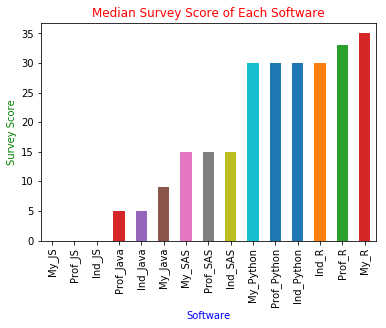

In [79]:
software_df.median().sort_values().plot(kind='bar')
plt.title('Median Survey Score of Each Software',color='red')
plt.xlabel('Software',color='blue')
plt.ylabel('Survey Score',color='green')
plt.show()

In [80]:
course_interest_df=survey_df.loc[:,'Python_Course_Interest':'Systems_Analysis_Course_Interest']
course_interest_df.head()

Python_Course_Interest  Foundations_DE_Course_Interest  \
RespondentID                                                           
5135740122                      50.0                            90.0   
5133300037                      20.0                            50.0   
5132253300                     100.0                            70.0   
5132096630                      85.0                            60.0   
5131990362                      60.0                            10.0   

              Analytics_App_Course_Interest  Systems_Analysis_Course_Interest  
RespondentID                                                                   
5135740122                             51.0                              50.0  
5133300037                             90.0                              50.0  
5132253300                            100.0                              60.0  
5132096630                             90.0                              82.0  
5131990362                             40.0                              80.0

In [81]:
course_interest_df.describe()

Python_Course_Interest  Foundations_DE_Course_Interest  \
count              206.000000                      200.000000   
mean                73.529126                       58.045000   
std                 29.835429                       32.588079   
min                  0.000000                        0.000000   
25%                 53.000000                       29.500000   
50%                 82.500000                       60.000000   
75%                100.000000                       89.250000   
max                100.000000                      100.000000   

       Analytics_App_Course_Interest  Systems_Analysis_Course_Interest  
count                     203.000000                        200.000000  
mean                       55.201970                         53.630000  
std                        34.147954                         33.539493  
min                         0.000000                          0.000000  
25%                        25.000000                         21.500000  
50%                        60.000000                         51.500000  
75%                        85.000000                         80.250000  
max                       100.000000                        100.000000

In [82]:
course_interest_df.mean().sort_values()

Systems_Analysis_Course_Interest    53.630000
Analytics_App_Course_Interest       55.201970
Foundations_DE_Course_Interest      58.045000
Python_Course_Interest              73.529126
dtype: float64

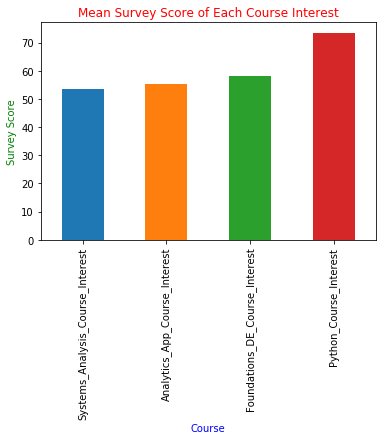

In [83]:
course_interest_df.mean().sort_values().plot(kind='bar')
plt.title('Mean Survey Score of Each Course Interest',color='red')
plt.xlabel('Course',color='blue')
plt.ylabel('Survey Score',color='green')
plt.show()

In [84]:
#this is the end of the data visualization section
#the next section involves data transformation using scikit learn

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


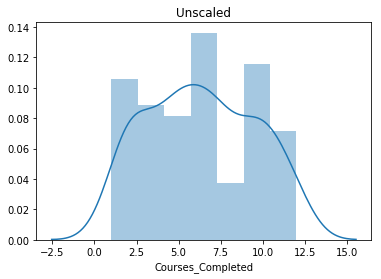

In [86]:
#Unscaled
unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


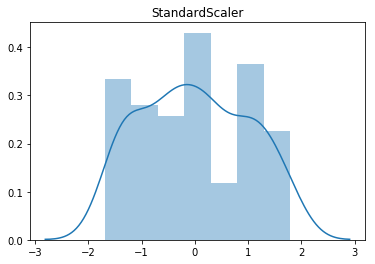

In [87]:
#Standard Scaler
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(np.array(X).reshape(-1,1))).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  
#replaced original jump start code fit_transform(X) with fit_transform(np.array(X).reshape(-1,1))
#another way to fix the error is fit_transform(X.to_frame(name=None))
#otherwise will get a coding error. Got solution from students in WhatsApp and Canvas DB

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


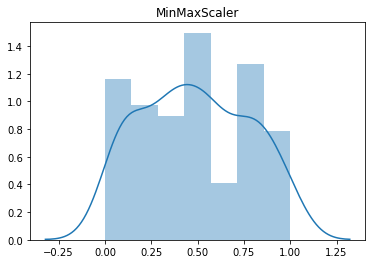

In [88]:
#Min Max Scaler
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(np.array(X).reshape(-1,1))).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
#replaced original jump start code fit_transform(X) with fit_transform(np.array(X).reshape(-1,1))
#another way to fix the error is fit_transform(X.to_frame(name=None))
#otherwise will get a coding error. Got solution from students in WhatsApp and Canvas DB

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


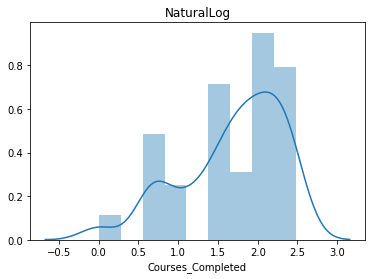

In [89]:
#Natural Log
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

In [90]:
#Thank you for viewing my code!